# 📓 06_predictive_modeling.ipynb — Predictive Modeling for Reuse

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load data
df = pd.read_csv("C:/Users/manav/Desktop/cleaned_data.csv")


In [3]:
# Select features and target
features = ['gridfins', 'legs', 'landingpad', 'reusedcount']
target = 'reused'

# Encode categorical features
df_encoded = df.copy()
le = LabelEncoder()

for col in ['gridfins', 'legs', 'landingpad']:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

X = df_encoded[features]
y = df_encoded[target]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


In [5]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.6296296296296297

Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.75      0.71        16
        True       0.56      0.45      0.50        11

    accuracy                           0.63        27
   macro avg       0.61      0.60      0.60        27
weighted avg       0.62      0.63      0.62        27



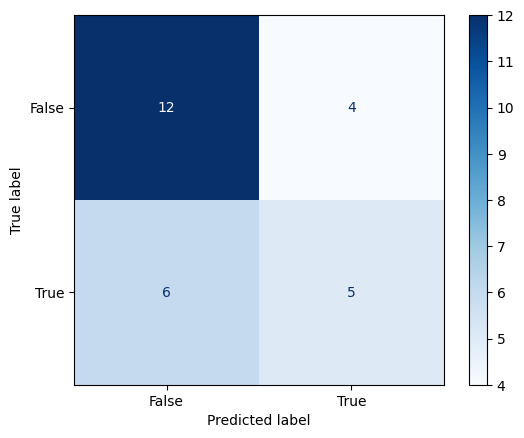

In [6]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='Blues')
plt.show()
